In [220]:
import ast
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import numpy as np

In [221]:
def read_file(name):
    """
    Input a text file with a dictionnary like data format and output this file as a dictionnary

    Parameters
    ----------
    name : str
        file path

    """
    file = open(name, "r")

    contents = file.read()
    dictionary = ast.literal_eval(contents)

    file.close()
    return dictionary
    
data = read_file('datasets/test-1.txt')

In [222]:
def get_point_coord(data):
    """
    Input a dictionnary with nodes, extract the valSues of each nodes (x, y and id) and output them into a list format such as : 
    x_point_list [x1,x2...xn]
    y_point_list [y1,y2...yn]
    id_point_list [id1,id2...idn]

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    x_cord_list = []
    y_cord_list = []
    id_cord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        x_cord_list.append(node.get('x'))
        y_cord_list.append(node.get('y'))
        id_cord_list.append(node.get('id'))
    return x_cord_list, y_cord_list, id_cord_list

def get_edges_coord(data):


    """
    Input a dictionnary with nodes and edges, extract for each edges : the id of the starting point (is matched with the coordinate of the point), 
    the id of the ending point (is matched with the coordinate of the point) and the coordinates of the bends and output it in this format : 

    edge_list = [[[x_11, x_12, ..., x_1n],[y_11, y_12, ..., y_1n]], ... ,[[x_n1, x_n2, ..., x_nn],[y_n1, y_n2, ..., y_nn]]]

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    
    node_x_cord_list = []
    node_y_cord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        node_x_cord_list.append(node.get('x'))
        node_y_cord_list.append(node.get('y'))
    
    edge_list = []
    edge_description = data.get('edges')

    for edge in edge_description:
        cord_list = []
        start = edge.get('source')
        stop  = edge.get('target')
        bend_list = edge.get('bends')

        if bend_list != None:
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            for bend in bend_list:
                cord_list.append([bend.get('x'),bend.get('y')])

            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])

            edge_list.append(cord_list)
        else:
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])
            edge_list.append(cord_list)

    return edge_list


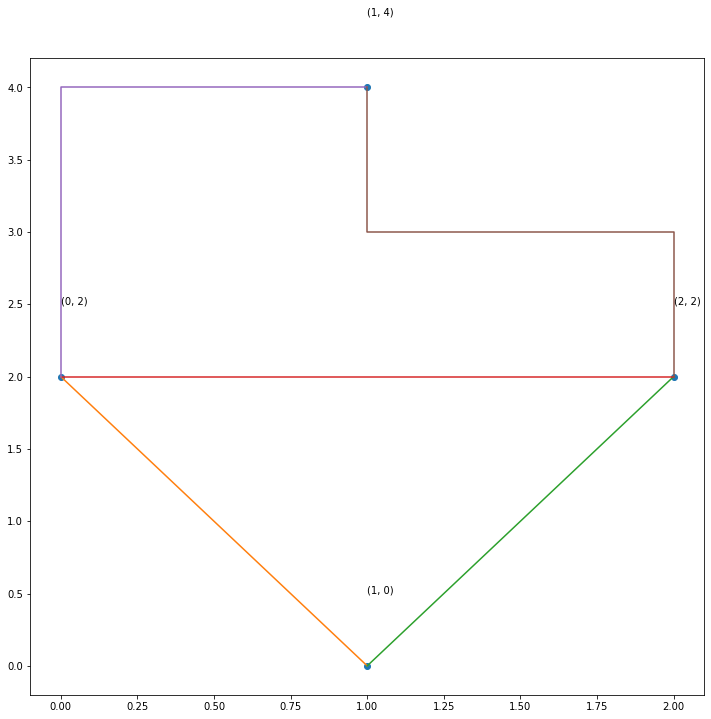

In [223]:
def show_graph(data):
    x_point_list, y_point_list, id_point_list = get_point_coord(data)
    plt.rcParams["figure.figsize"] = [10, 10]
    plt.rcParams["figure.autolayout"] = True

    plt.plot(x_point_list, y_point_list, 'o')

    for i, j in zip(x_point_list, y_point_list):
        plt.text(i, j+0.5, '({}, {})'.format(i, j))

    for edge in get_edges_coord(data):
        x_coord = []
        y_coord = []
        for point in edge:
            x_coord.append(point[0])
            y_coord.append(point[1])
        plt.plot(x_coord, y_coord)
    plt.show()

show_graph(data)

In [224]:
def check_int_coordinates(data) :

    x_cord_list = []
    y_cord_list = []
    id_cord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        x_cord_list.append(node.get('x'))
        y_cord_list.append(node.get('y'))
        id_cord_list.append(node.get('id'))
    
    valid = True

    for value in x_cord_list:   
        if isinstance(value, int) == False:
            valid = False
    
    for value in y_cord_list:   
        if isinstance(value, int) == False:
            valid = False
    
    if valid:
        print('the coordinates are valid ! ')
    else:
        print('the coordinates are not valid ! ')

    return valid

check_int_coordinates(data)

the coordinates are valid ! 


True

In [225]:
def number_of_bend(data, max_bend_wanted) :

    max_bend = 0

    node_x_cord_list = []
    node_y_cord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        node_x_cord_list.append(node.get('x'))
        node_y_cord_list.append(node.get('y'))
    
    edge_list = []
    edge_description = data.get('edges')

    for edge in edge_description:
        cord_list = []
        start = edge.get('source')
        stop  = edge.get('target')
        bend_list = edge.get('bends')

        bend_actual = 0

        if bend_list != None:
            
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            for bend in bend_list:
                cord_list.append([bend.get('x'),bend.get('y')])
                bend_actual +=1
            if bend_actual > max_bend:
                max_bend = bend_actual

            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])

            edge_list.append(cord_list)
        else:
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])
            edge_list.append(cord_list)
    
    print('there is ',max_bend, 'bend(s) and you wanted a maximum of', max_bend_wanted, 'bend.')
    return max_bend < max_bend_wanted

number_of_bend(data,5)
    

there is  2 bend(s) and you wanted a maximum of 5 bend.


True

In [226]:

def get_orientation(point1, point2, point3):
    
    x1,y1 = point1
    x2,y2 = point2
    x3,y3 = point3

    result = (y2 - y1)*(x3 - x2) - (y3 - y2)*(x2 - x1)

    if point1 == point2 or point1 == point3:
        result =0

    if result < 0:
        return 'counterclockwise'
    elif result > 0 : 
        return 'clockwise'

def segment_intersection(segment1, segment2):
    point1, point2 = segment1
    point3, point4 = segment2

    if get_orientation(point1, point2, point3) != get_orientation(point1, point2, point4):
        if get_orientation(point3, point4, point1) != get_orientation(point3, point4, point2):
            return True
        else: 
            return False
    else:
        return False


def edges_crossing(data):
    edge_list = get_edges_coord(data)
    segment_list = []

    for edge in edge_list:
        for i in range(len(edge)-1):
            segment_list.append([edge[i],edge[i+1]])
    segment_list

    
    result = False
    for segment1 in segment_list:
        for segment2 in segment_list:
            point1, point2 = segment1
            point3, point4 = segment1

            if point1 != point3 and point1 != point4 and point2 != point3 and point3 != point4:
                if segment_intersection(segment1, segment2) == True:
                    print('there is an intersection between',segment1, 'and',segment2)
                    result = True
                    return result
    if result == False:
        print('there is no intersection')
        return result

edges_crossing(data)        

there is no intersection


False

In [227]:
def euclidian_distance(point1, point2):
    x1,y1 = point1
    x2, y2 = point2
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def compute_edge_length(data):
    edge_list = get_edges_coord(data)
    edge_length_list = []

    for edge in edge_list:
        edge_length = 0
        for i in range(len(edge)-1):
            point1 = edge[i][0],edge[i][1]
            point2 = edge[i+1][0], edge[i+1][1]
            edge_length += euclidian_distance(point1, point2)
        edge_length_list.append(edge_length)
    return edge_length_list

def compute_ratio(data):
    edge_length = compute_edge_length(data)

    minima = min(edge_length)
    maxima = max(edge_length)

    return maxima/minima

compute_ratio(data)

1.5

In [228]:
def find_neighbour(data):
    vertex_list = []
    neighbour_list = []
    edge_list = get_edges_coord(data)
    node_list = data.get('nodes')
    for node in node_list:
        vertex_list.append([node.get('x'), node.get('y')])
    

    for vertex in vertex_list:
        neighbour = []
        for edge in edge_list:
            first_point = edge[0]
            last_point = edge[-1]

            if vertex == first_point:
                neighbour.append(last_point)
            if vertex == last_point:
                neighbour.append(first_point)
        neighbour_list.append(neighbour)
    
    return neighbour_list
neighbour_list = find_neighbour(data)
neighbour_list

[[[0, 2], [2, 2]],
 [[1, 0], [2, 2], [1, 4]],
 [[1, 0], [0, 2], [1, 4]],
 [[0, 2], [2, 2]]]

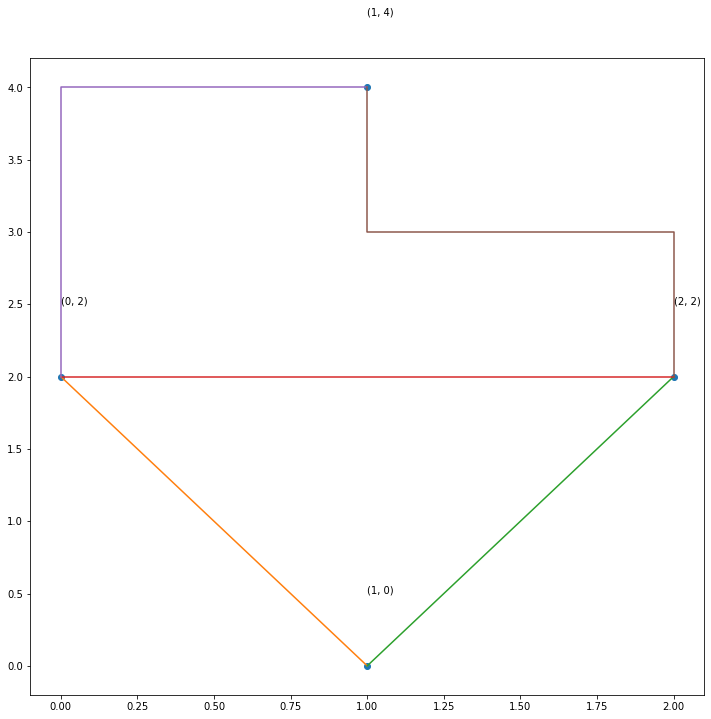

1.5

In [229]:
show_graph(data)
compute_ratio(data)

1 0 become :  0 2


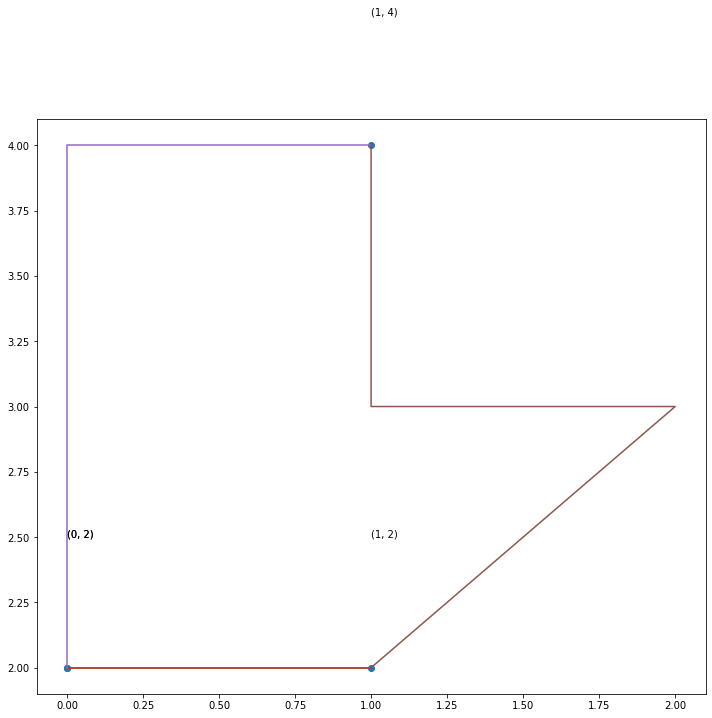

ZeroDivisionError: float division by zero

In [233]:
def compute_centroid(polygon):
    x_cords = []
    y_cords = []
    for point in polygon:
        x_cords.append(point[0])
        y_cords.append(point[1])
    x_centroid = 0
    y_centroid = 0
    for x in x_cords:
        x_centroid += int(x)

    for y in y_cords:
        y_centroid +=int(y)
    
    
    return (x_centroid/len(polygon), y_centroid/len(polygon))


def move_point(id):

    global data
    
    neighbour_list = find_neighbour(data)
    vertex_list = get_point_coord(data)
 
    point_list = []
    for i in range(len(vertex_list[0])):
        points= []
        for j in range(len(vertex_list)):
            points.append(vertex_list[j][i])
        point_list.append(points)
    
    for vertex in point_list:
        x,y,v_id  = vertex

        if v_id == id:
            v_x = x
            v_y = y
    
    

    neighbour  = neighbour_list[id]
    centroid = compute_centroid(neighbour)

    print(v_x, v_y, 'become : ', round(centroid[0]), round(centroid[1]))

    
    
    data['nodes'][id]['x'] = round(centroid[0])
    data['nodes'][id]['y'] = round(centroid[1])

    show_graph(data)
    print(compute_ratio(data))

move_point(0)

In [231]:
vertex_list

([1, 0, 2, 1], [0, 2, 2, 4], [0, 1, 2, 3])

In [232]:
a = (0,1)
a[0]

0